<a href="https://colab.research.google.com/github/gokulbytes/predictive-model-for-credit-card-fraud-detection/blob/main/main_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/dataset.csv')
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


# Data Transformation

In [2]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

df['hour']=df['trans_date_trans_time'].dt.hour
df['day']=df['trans_date_trans_time'].dt.day
df['month']=df['trans_date_trans_time'].dt.month

In [3]:
drop_columns=['Unnamed: 0','trans_date_trans_time','first','last','street','city','zip','dob','job','trans_num']
df=df.drop(columns=drop_columns)

In [4]:
df.head()

,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0,1,1


# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

cat_col=['merchant','category','gender']
encoders={}

for col in cat_col:
  encoders[col]=LabelEncoder()
  df[col]=encoders[col].fit_transform(df[col])

In [6]:
from geopy.distance import geodesic

def haversine(lat1,lon1,lat2,lon2):
  return np.array([geodesic((a,b),(c,d)).km for a,b,c,d in zip(lat1,lon1,lat2,lon2)])

In [7]:
df['distance']=haversine(df['lat'],df['long'],df['merch_lat'],df['merch_long'])
df.head()

,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,distance
0,2703186189652095,514,8,4.97,0,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,1,78.773821
1,630423337322,241,4,107.23,0,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,1,30.216618
2,38859492057661,390,0,220.11,1,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,1,108.102912
3,3534093764340240,360,2,45.00,1,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,1,95.685115
4,375534208663984,297,9,41.96,1,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,0,1,1,77.702395


In [8]:
features=['merchant','category','amt','cc_num','hour','day','month','gender','distance']

x=df[features]
y=df['is_fraud']

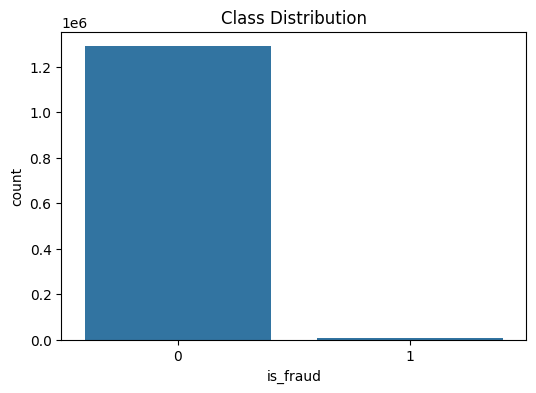

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud',data=df)
plt.title('Class Distribution')
plt.show()

In [10]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(x,y)

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

# LightGBM

In [12]:
import lightgbm as lgb

lgb_model=lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',metric='auc',is_unbalance=True,learning_rate=0.5,num_leaves=31,max_depth=1,n_estimators=200)
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 1030687, number of negative: 1031983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 2062670, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499686 -> initscore=-0.001257
[LightGBM] [Info] Start training from score -0.001257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(is_unbalance=True, learning_rate=0.5, max_depth=1, metric='auc',
               n_estimators=200, objective='binary')

# Model Evaluation

In [13]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc

y_pred=lgb_model.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('\nClassification Report:\n',classification_report(y_test,y_pred))
print('ROC_AUC_Score: ',roc_auc_score(y_test,y_pred))


Confusion Matrix:
 [[242186  15000]
 [ 33597 224885]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91    257186
           1       0.94      0.87      0.90    258482

    accuracy                           0.91    515668
   macro avg       0.91      0.91      0.91    515668
weighted avg       0.91      0.91      0.91    515668

ROC_AUC_Score:  0.9058491745689686


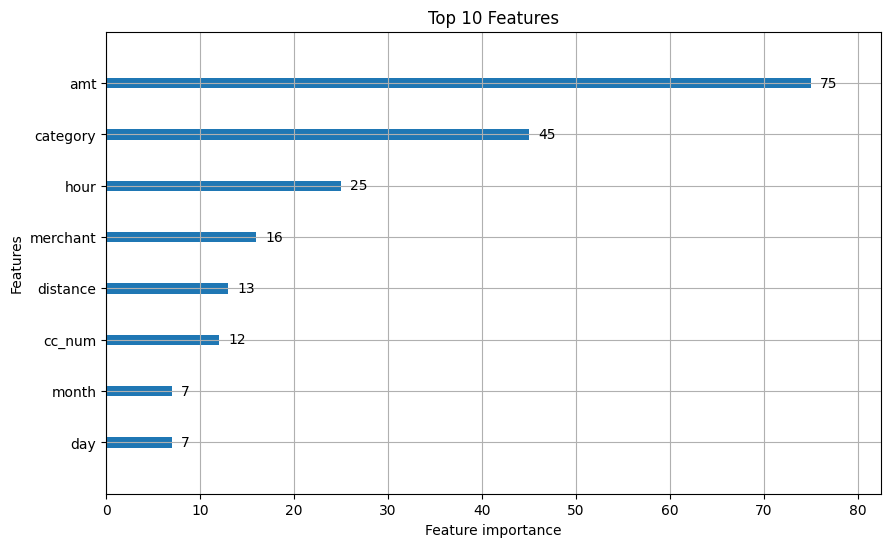

In [14]:
lgb.plot_importance(lgb_model,max_num_features=10,importance_type='split',figsize=(10,6))
plt.title('Top 10 Features')
plt.show()

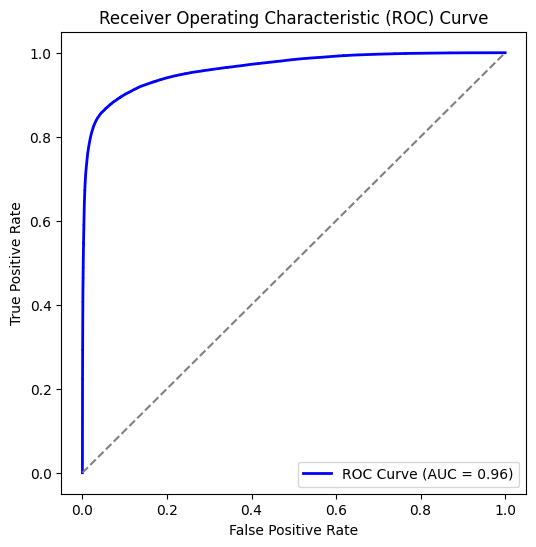

In [15]:
y_pred_proba=lgb_model.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [16]:
import joblib

joblib.dump(lgb_model,'fraud_detection_model.pkl')
joblib.dump(encoders,'label_encoder.pkl')

['label_encoder.pkl']